# Introduction

In this assignment, I trained and evaluated ten neural network models using the IMDB dataset to optimize performance through architectural and functional adjustments. Specifically, I experimented with different numbers of hidden layers, activation functions, and loss functions to identify the most effective configuration. Additionally, I implemented techniques such as dropout and regularization to prevent overfitting and improve validation accuracy. Through this process, I gained deeper insights into how various neural network design choices influence learning behavior and overall model performance in deep learning applications.




### The IMDB dataset

**Loading the IMDB dataset**

In [2]:
from tensorflow.keras.datasets import imdb
(train_set, train_labels), (test_set, test_labels) = imdb.load_data(
    num_words=10000)

In [3]:
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset, keeping only the top 10,000 most common words
(train_set, train_labels), (test_set, test_labels) = imdb.load_data(num_words=10000)

# Display the total number of samples in training and testing sets
print(f"Training samples: {len(train_set)}")
print(f"Testing samples: {len(test_set)}")

# Display the first review represented as a sequence of integer indices
print("Sample training review (encoded as integers):", train_set[0])

# Display the label for the first review (0 = negative, 1 = positive)
print("Label for the sample review:", train_labels[0])


Training samples: 25000
Testing samples: 25000
Sample training review (encoded as integers): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103

In [4]:
# Retrieve the word index dictionary mapping words to integer IDs
word_index = imdb.get_word_index()

# Reverse the word index to map integer IDs to words
reversed_word_index = {value: key for key, value in word_index.items()}
def review_decoded(encoded_review):
    return " ".join([reversed_word_index.get(i - 3, "?") for i in encoded_review])

# Decode and print the first review
print("Decoded Review:", review_decoded(train_set[0]))

import numpy as np

# Unique Count of each label
unique, counts = np.unique(train_labels, return_counts=True)
print("distribution of Labels:", dict(zip(unique, counts)))





Decoded Review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have do

In [5]:
train_set[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

np.int64(1)

In [7]:
max([max(sequence) for sequence in train_set])

9999

**Decoding reviews back to text**

In [8]:
word_index = imdb.get_word_index()
reversed_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reversed_word_index.get(i - 3, "?") for i in train_set[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
train_x = vectorize_sequences(train_set)
test_x = vectorize_sequences(test_set)

In [10]:
train_x[0]
len(train_x)
len(test_x)

25000

In [11]:
train_y = np.asarray(train_labels).astype("float32")
test_y = np.asarray(test_labels).astype("float32")

## **Model 1**
Building the model with 1 Hidden Layers and 64 units per layer with relu activation and Binary_crossentropy function

**Model definition**

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model1 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model with following aspects:**

1.   rmsprop as model optimizer
2.   Binary_crossentropy as loss function
3.   accuracy as the performance metrics


In [13]:
model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating the model

**Setting aside a validation set and train set out of actual train data**

In [14]:
x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]

In [15]:
print("x_train shape:", train_x.shape)
print("y_train shape:", train_y.shape)

print("x_val shape:", x_valid.shape)
print("y_val shape:", y_valid.shape)

print("x_test shape:", test_x.shape)
print("y_test shape:", test_y.shape)


x_train shape: (25000, 10000)
y_train shape: (25000,)
x_val shape: (10000, 10000)
y_val shape: (10000,)
x_test shape: (25000, 10000)
y_test shape: (25000,)




**Training the model**

In [16]:
history = model1.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.6905 - loss: 0.5761 - val_accuracy: 0.8479 - val_loss: 0.3888
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8934 - loss: 0.3236 - val_accuracy: 0.8827 - val_loss: 0.3067
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9144 - loss: 0.2503 - val_accuracy: 0.8837 - val_loss: 0.2891
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9326 - loss: 0.2058 - val_accuracy: 0.8868 - val_loss: 0.2793
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9400 - loss: 0.1846 - val_accuracy: 0.8856 - val_loss: 0.2778
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9465 - loss: 0.1605 - val_accuracy: 0.8854 - val_loss: 0.2795
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9532 - loss: 0.1434 - val_accuracy: 0.8837 - val_loss: 0.2880
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9570 - loss: 0.1349 - val_accuracy: 0.8815 - v

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

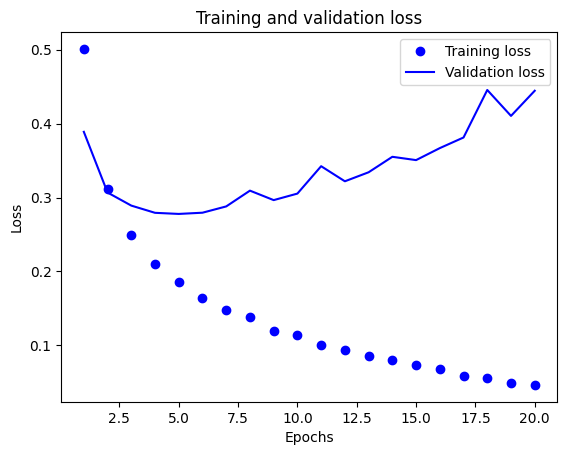

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

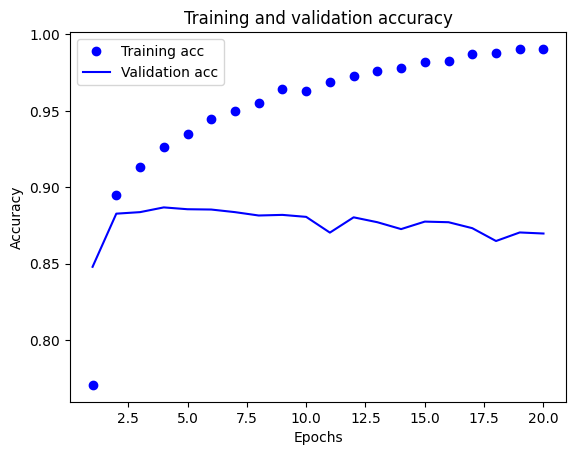

In [19]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch considering epochs 6 as it is where the model achieved the lowest loss.**

In [97]:

model1 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model1.fit(train_x, train_y, epochs=5, batch_size=512)
results_valid = model1.evaluate(x_valid, y_valid)


Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7195 - loss: 0.5396
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9000 - loss: 0.2788
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9158 - loss: 0.2248
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9319 - loss: 0.1916
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9371 - loss: 0.1770
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9517 - loss: 0.1496


In [98]:
results_valid

[0.15309011936187744, 0.9503999948501587]

In [99]:
model1.fit(train_x, train_y, epochs=5, batch_size=512)
results_test = model1.evaluate(test_x, test_y)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9483 - loss: 0.1554
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9469 - loss: 0.1485
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9518 - loss: 0.1368
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9595 - loss: 0.1211
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9599 - loss: 0.1162
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8718 - loss: 0.3400


In [100]:
results_test

[0.337186723947525, 0.8741599917411804]

Interpretation: The test loss of 0.3531 indicates that the model’s predictions are reasonably close to the true outputs, reflecting a good fit between predicted and actual labels, although loss alone does not guarantee generalization. The test accuracy of approximately 0.8745 (about 88%) shows


that the model correctly classified around 88% of IMDB reviews as positive or negative.

### Using a trained model 1 to generate predictions on new data

In [24]:
model1.predict(test_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.11363428],
       [0.9999193 ],
       [0.25199163],
       ...,
       [0.0578151 ],
       [0.02791618],
       [0.6040708 ]], dtype=float32)

## Summary

## **Model 2**
#### (Model 2 has 3 hidden layer with 32 units, uses the ReLU activation function, and is trained using the binary cross-entropy loss function.)

In [25]:
# Build model 2 with one hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model2 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


#Compile the model with binary cross-entropy loss
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])



In [26]:
#Set aside the validation set
x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]




In [27]:
history = model2.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

history_dict = history.history
history_dict.keys()



Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.6885 - loss: 0.5867 - val_accuracy: 0.8708 - val_loss: 0.3450
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8843 - loss: 0.3122 - val_accuracy: 0.8909 - val_loss: 0.2849
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9234 - loss: 0.2082 - val_accuracy: 0.8910 - val_loss: 0.2781
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9505 - loss: 0.1513 - val_accuracy: 0.8324 - val_loss: 0.4345
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9464 - loss: 0.1438 - val_accuracy: 0.8562 - val_loss: 0.4125
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9591 - loss: 0.1140 - val_accuracy: 0.8824 - val_loss: 0.3237
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9664 - loss: 0.0968 - val_accuracy: 0.8718 - val_loss: 0.3867
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9868 - loss: 0.0537 - val_accuracy: 0.8767 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

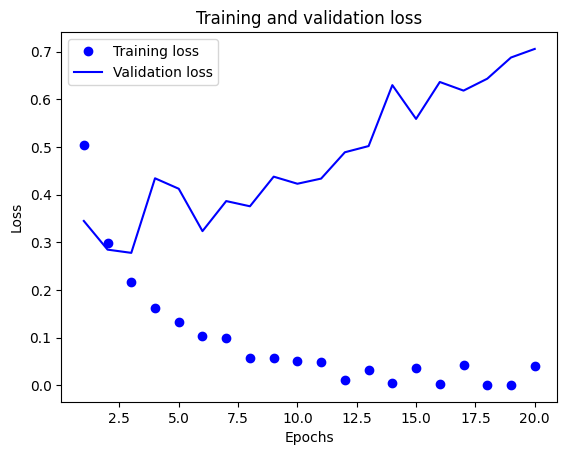

In [28]:
#Plot the training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



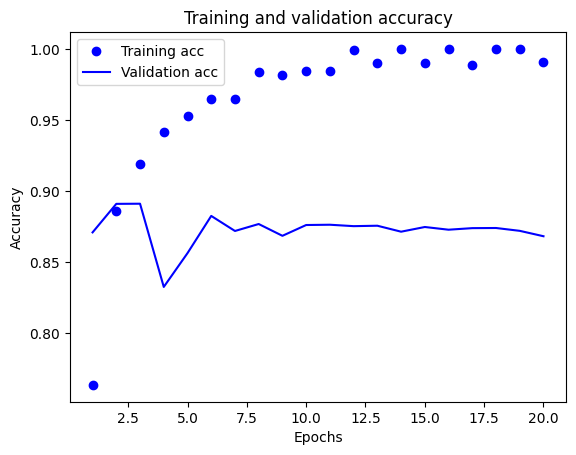

In [29]:
#Plot training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [30]:
#Re-train a model from scratch using best epochs = 3.

model2 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model2.fit(train_x, train_y, epochs=3, batch_size=512)
results_valid = model2.evaluate(x_valid, y_valid)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7020 - loss: 0.5732
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9001 - loss: 0.2744
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9267 - loss: 0.2064
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9460 - loss: 0.1595


In [31]:
results_valid

[0.16206611692905426, 0.9453999996185303]

In [32]:
model2.fit(train_x, train_y, epochs=3, batch_size=512)
results_test = model2.evaluate(test_x, test_y)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9383 - loss: 0.1701
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9484 - loss: 0.1413
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9582 - loss: 0.1203
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8742 - loss: 0.3406


In [33]:
results_test

[0.33709391951560974, 0.8758400082588196]

In [34]:
model2.predict(test_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.1431349 ],
       [0.9998543 ],
       [0.9739371 ],
       ...,
       [0.090995  ],
       [0.02868307],
       [0.90239954]], dtype=float32)

## **Model 3**
#### (Model 3 with 1 hidden layer with 64 units, uses the Tanh activation function and Binary-crossentropy)

In [35]:
# build the model with three hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model3 = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#Validating the model

x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]

#Training the model

history = model3.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.7063 - loss: 0.5759 - val_accuracy: 0.8349 - val_loss: 0.3941
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8958 - loss: 0.3000 - val_accuracy: 0.8719 - val_loss: 0.3115
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9137 - loss: 0.2374 - val_accuracy: 0.8778 - val_loss: 0.2966
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9245 - loss: 0.2008 - val_accuracy: 0.8864 - val_loss: 0.2742
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9498 - loss: 0.1574 - val_accuracy: 0.8849 - val_loss: 0.2842
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9555 - loss: 0.1348 - val_accuracy: 0.8679 - val_loss: 0.3520
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9569 - loss: 0.1250 - val_accuracy: 0.8795 - val_loss: 0.3102
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9677 - loss: 0.0996 - val_accuracy: 0.8661 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

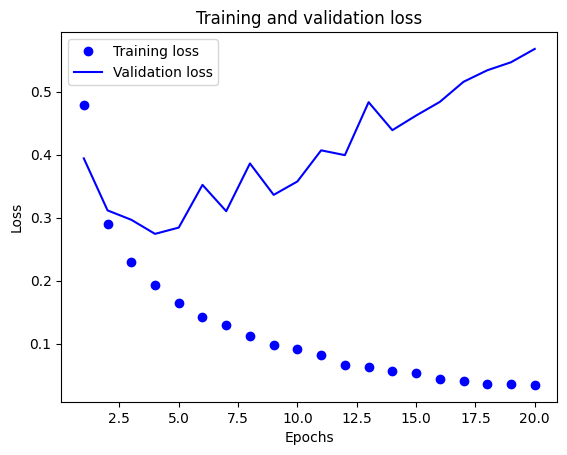

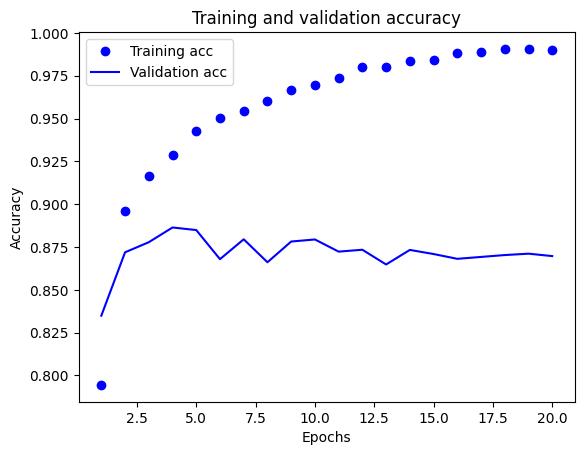

In [36]:
#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [37]:
#Re-train a model from scratch using best epoch = 4.
model3 = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model3.fit(train_x, train_y, epochs=4, batch_size=512)
results_valid = model3.evaluate(x_valid, y_valid)




Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7505 - loss: 0.5284
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8985 - loss: 0.2741
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9206 - loss: 0.2154
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9338 - loss: 0.1787
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9503 - loss: 0.1450


In [38]:
results_valid

[0.15005221962928772, 0.9480000138282776]

In [39]:
model3.fit(train_x, train_y, epochs=4, batch_size=512)
results_test = model3.evaluate(test_x, test_y)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9428 - loss: 0.1565
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9412 - loss: 0.1563
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9493 - loss: 0.1379
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9579 - loss: 0.1182
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8651 - loss: 0.3776


In [40]:
results_test

[0.37073662877082825, 0.8687199950218201]

In [41]:
model3.predict(test_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.13286945],
       [0.999997  ],
       [0.8429787 ],
       ...,
       [0.16516039],
       [0.04012985],
       [0.85404015]], dtype=float32)

## **Model 4**
#### (Model 4 has 3 hidden layers with 32 units respectively, uses the tanh activation function)

In [42]:
# build the model with two hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model4 = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#Validating the model

x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]


#Training the model

history = model4.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

history_dict = history.history
history_dict.keys()




Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.6845 - loss: 0.5675 - val_accuracy: 0.8765 - val_loss: 0.3148
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9026 - loss: 0.2576 - val_accuracy: 0.8619 - val_loss: 0.3354
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9234 - loss: 0.1956 - val_accuracy: 0.8885 - val_loss: 0.2848
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9446 - loss: 0.1507 - val_accuracy: 0.8807 - val_loss: 0.3114
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9611 - loss: 0.1155 - val_accuracy: 0.8663 - val_loss: 0.3785
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9623 - loss: 0.1063 - val_accuracy: 0.8675 - val_loss: 0.3850
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9724 - loss: 0.0839 - val_accuracy: 0.8760 - val_loss: 0.3927
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9830 - loss: 0.0572 - val_accuracy: 0.8758 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

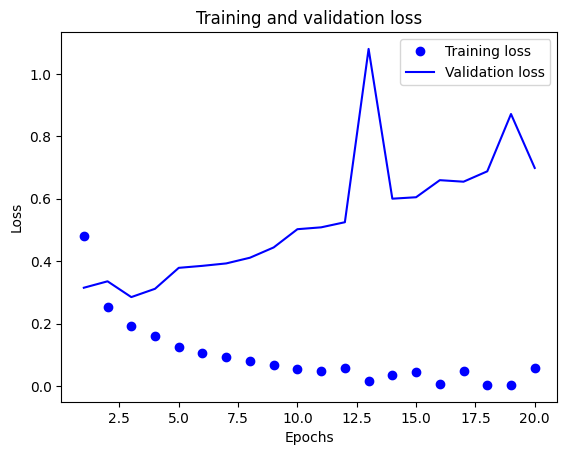

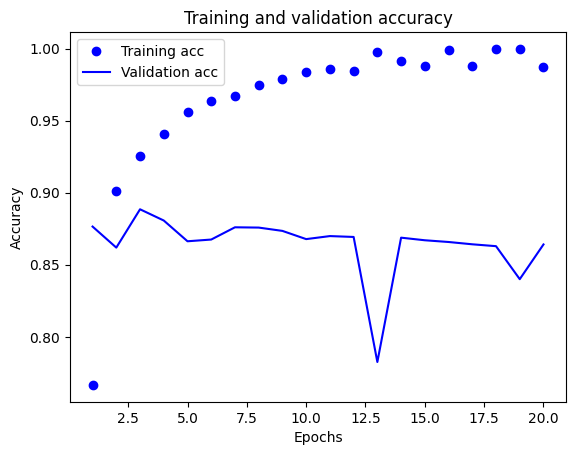

In [43]:
#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [44]:
#Re-train a model from scratch using best epoch = 3.
model4 = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model4.fit(train_x, train_y, epochs=3, batch_size=512)
results_valid = model4.evaluate(x_valid, y_valid)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7494 - loss: 0.5087
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9095 - loss: 0.2323
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9356 - loss: 0.1763
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9595 - loss: 0.1236


In [45]:
results_valid

[0.12762555480003357, 0.9591000080108643]

In [46]:
model4.fit(train_x, train_y, epochs=2, batch_size=512)
results_test = model4.evaluate(test_x, test_y)

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9444 - loss: 0.1497
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9557 - loss: 0.1236
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8028 - loss: 0.5581


In [47]:
results_test

[0.561060905456543, 0.8036400079727173]

In [48]:
model4.predict(test_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.01647747],
       [0.99824715],
       [0.05961264],
       ...,
       [0.01705484],
       [0.00852392],
       [0.12907042]], dtype=float32)

## **Model 5**
#### (Model 5 has 2 hidden layers with 64 units respectively, uses the relu activation and MSE Loss Function)

In [49]:
# build the model with two hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model5 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model5.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

#Validating the model

x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]

#Training the model

history = model5.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.6481 - loss: 0.2132 - val_accuracy: 0.8594 - val_loss: 0.1188
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8660 - loss: 0.1096 - val_accuracy: 0.8757 - val_loss: 0.0944
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9035 - loss: 0.0795 - val_accuracy: 0.8873 - val_loss: 0.0857
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9246 - loss: 0.0630 - val_accuracy: 0.8844 - val_loss: 0.0856
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9282 - loss: 0.0573 - val_accuracy: 0.8694 - val_loss: 0.0954
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9492 - loss: 0.0451 - val_accuracy: 0.8790 - val_loss: 0.0876
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9453 - loss: 0.0444 - val_accuracy: 0.8664 - val_loss: 0.1002
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9590 - loss: 0.0361 - val_accuracy: 0.8797 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

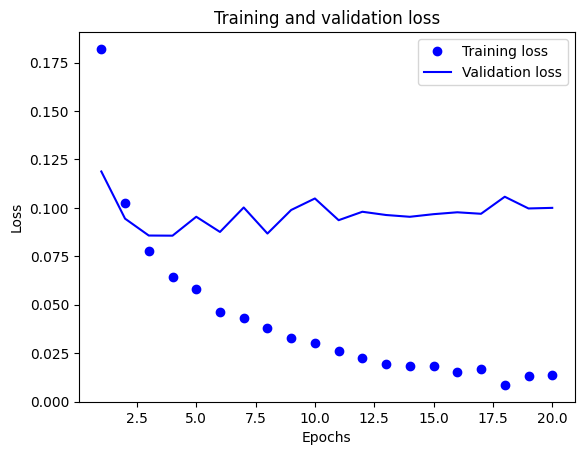

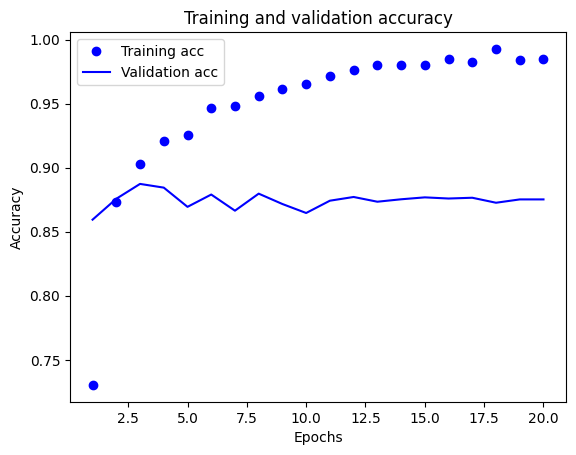

In [50]:
#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [101]:
#Re-train the model from scratch using epochs = 4.
model5 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model5.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model5.fit(train_x, train_y, epochs=4, batch_size=512)
results_valid = model5.evaluate(x_valid, y_valid)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7171 - loss: 0.1911
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8909 - loss: 0.0886
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9098 - loss: 0.0699
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9279 - loss: 0.0575
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9291 - loss: 0.0548


In [102]:
results_valid

[0.05639791861176491, 0.9266999959945679]

In [103]:
model5.fit(train_x, train_y, epochs=4, batch_size=512)
results_test = model5.evaluate(test_x, test_y)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9387 - loss: 0.0502
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9401 - loss: 0.0474
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9450 - loss: 0.0436
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9651 - loss: 0.0322
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8754 - loss: 0.0924


In [104]:
results_test

[0.0916614755988121, 0.8784400224685669]

In [105]:
model5.predict(test_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.05524196],
       [0.9996507 ],
       [0.6959469 ],
       ...,
       [0.10793345],
       [0.0251418 ],
       [0.73183995]], dtype=float32)

## **Model 6**
#### (Model 6 has 3 hidden layers with 32 units respectively, uses the relu activation function, and is trained using the mse as loss function.)

In [56]:
# build the model with 3 hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model6 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model6.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

#Validating the model

x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]


#Training the model

history = model6.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

history_dict = history.history
history_dict.keys()


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.6457 - loss: 0.2254 - val_accuracy: 0.7974 - val_loss: 0.1484
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8617 - loss: 0.1170 - val_accuracy: 0.8488 - val_loss: 0.1134
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9062 - loss: 0.0800 - val_accuracy: 0.8746 - val_loss: 0.0935
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9279 - loss: 0.0612 - val_accuracy: 0.8638 - val_loss: 0.1007
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9379 - loss: 0.0514 - val_accuracy: 0.8261 - val_loss: 0.1285
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9413 - loss: 0.0488 - val_accuracy: 0.8686 - val_loss: 0.0975
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9514 - loss: 0.0408 - val_accuracy: 0.8757 - val_loss: 0.0916
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9593 - loss: 0.0352 - val_accuracy: 0.8795 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

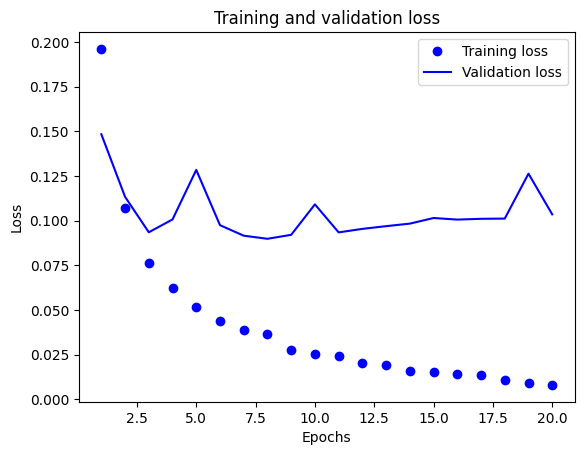

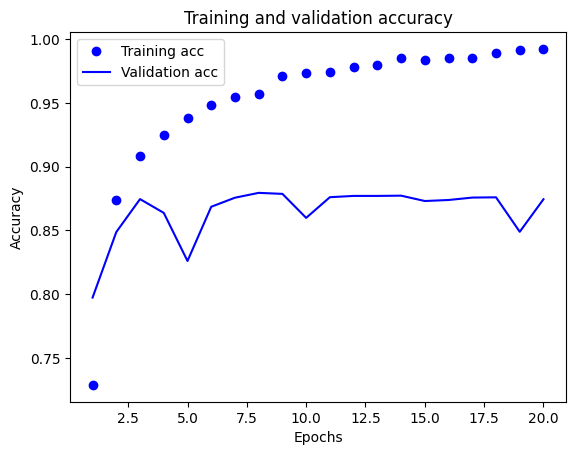

In [57]:
#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [106]:
#Re-train the model from scratch
model6 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model6.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model6.fit(train_x, train_y, epochs=3, batch_size=512)
results_valid = model6.evaluate(x_valid, y_valid)


Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6760 - loss: 0.2084
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8880 - loss: 0.0916
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9200 - loss: 0.0644
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9157 - loss: 0.0627


In [107]:
results_valid

[0.06421294808387756, 0.9132999777793884]

In [108]:
model6.fit(train_x, train_y, epochs=3, batch_size=512)
results_test = model6.evaluate(test_x, test_y)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9263 - loss: 0.0579
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9409 - loss: 0.0482
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9518 - loss: 0.0407
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8316 - loss: 0.1279


In [109]:
results_test

[0.1281110942363739, 0.8306000232696533]

In [110]:
model6.predict(test_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.08211592],
       [0.999967  ],
       [0.08394592],
       ...,
       [0.05798737],
       [0.04065138],
       [0.09241458]], dtype=float32)

## **Model 7**
#### (Model 7 with 2 hidden layers with 64 units respectively, uses the Tanh activation function, and is trained using the mean squared error loss function.)

In [63]:
# build the model with four hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model7 = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model7.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

#Validating the model

x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]

#Training the model

history = model7.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.7018 - loss: 0.2000 - val_accuracy: 0.8203 - val_loss: 0.1264
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8847 - loss: 0.0919 - val_accuracy: 0.8582 - val_loss: 0.1032
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9106 - loss: 0.0698 - val_accuracy: 0.8835 - val_loss: 0.0856
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9284 - loss: 0.0553 - val_accuracy: 0.8735 - val_loss: 0.0928
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9385 - loss: 0.0477 - val_accuracy: 0.8642 - val_loss: 0.1015
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9470 - loss: 0.0411 - val_accuracy: 0.8722 - val_loss: 0.0961
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9479 - loss: 0.0418 - val_accuracy: 0.8808 - val_loss: 0.0905
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9661 - loss: 0.0304 - val_accuracy: 0.8775 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

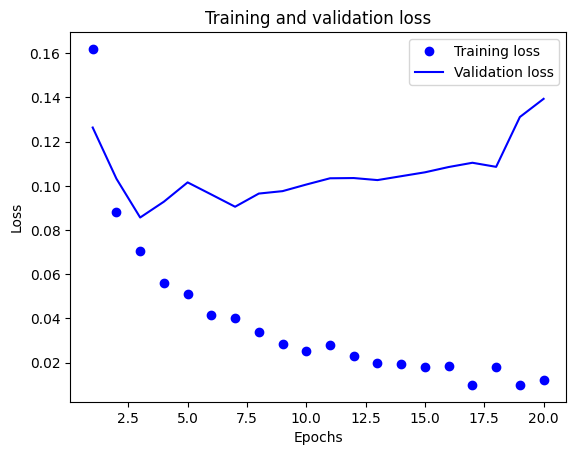

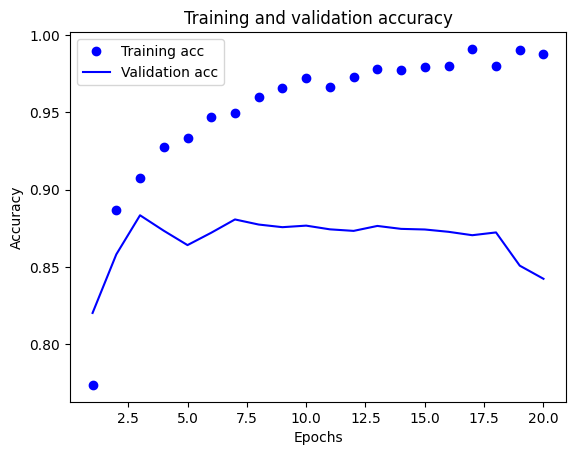

In [64]:
#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [65]:
#Re-train the model from scratch using epochs = 3.
model7 = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model7.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model7.fit(train_x, train_y, epochs=3, batch_size=512)
results_valid = model7.evaluate(x_valid, y_valid)



Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7239 - loss: 0.1831
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8907 - loss: 0.0830
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9198 - loss: 0.0626
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9039 - loss: 0.0677


In [66]:
results_valid

[0.07013300806283951, 0.9021000266075134]

In [67]:
model7.fit(train_x, train_y, epochs=3, batch_size=512)
results_test = model7.evaluate(test_x, test_y)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9213 - loss: 0.0590
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9396 - loss: 0.0466
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9414 - loss: 0.0463
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8711 - loss: 0.0995


In [68]:
results_test

[0.09944500029087067, 0.8715599775314331]

In [69]:
model7.predict(test_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.02528412],
       [0.9999511 ],
       [0.47817206],
       ...,
       [0.08800012],
       [0.02076474],
       [0.5741147 ]], dtype=float32)

## **Model 8**
#### Model 8 has 3 hidden layer with 32 units, uses the tanh activation function, and is trained using the MSE Loss Funcion.

In [70]:
# build the model with four hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model8 = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model7.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

#Validating the model

x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]

#Training the model

history = model7.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9246 - loss: 0.0581 - val_accuracy: 0.9382 - val_loss: 0.0480
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9679 - loss: 0.0289 - val_accuracy: 0.9364 - val_loss: 0.0503
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9689 - loss: 0.0273 - val_accuracy: 0.9174 - val_loss: 0.0636
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9731 - loss: 0.0245 - val_accuracy: 0.9277 - val_loss: 0.0570
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9741 - loss: 0.0244 - val_accuracy: 0.9386 - val_loss: 0.0493
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9736 - loss: 0.0237 - val_accuracy: 0.9295 - val_loss: 0.0566
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9817 - loss: 0.0175 - val_accuracy: 0.9294 - val_loss: 0.0563
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9827 - loss: 0.0166 - val_accuracy: 0.9208 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

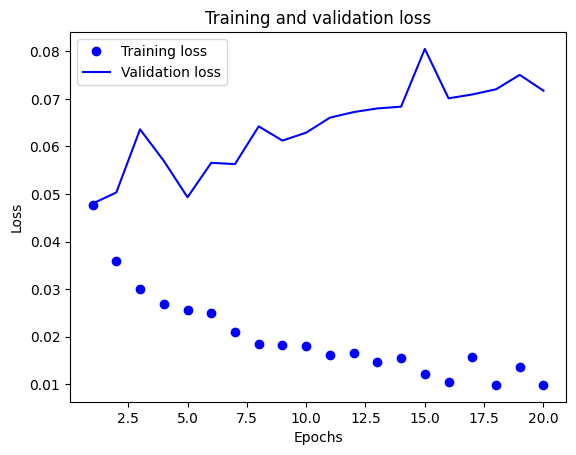

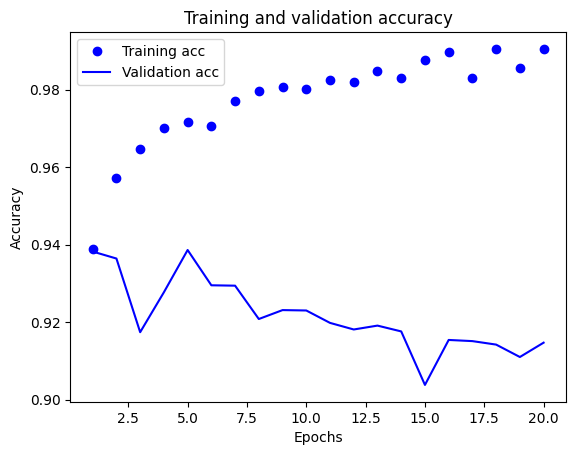

In [71]:
#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [72]:
#Re-train the model from scratch using epochs = 1.
model8 = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model8.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model8.fit(train_x, train_y, epochs=1, batch_size=512)
results_valid = model8.evaluate(x_valid, y_valid)

49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7187 - loss: 0.1794
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8943 - loss: 0.0795


In [73]:
results_valid

[0.07945147156715393, 0.8964999914169312]

In [74]:
model8.fit(train_x, train_y, epochs=1, batch_size=512)
results_test = model8.evaluate(test_x, test_y)

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8991 - loss: 0.0746
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8838 - loss: 0.0849


In [75]:
results_test

[0.08393876999616623, 0.8857200145721436]

In [76]:
model8.predict(test_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.21557017],
       [0.99735403],
       [0.84937847],
       ...,
       [0.09908094],
       [0.1040659 ],
       [0.63459986]], dtype=float32)

## **Model 9**
#### (Model 8 has 3 hidden layers with 32 units respectively, uses the Tanh activation function, includes a dropout of 0.5, and is trained using the mse loss function)



In [77]:
# creating the model with Dropout (0.5)
from tensorflow import keras
from tensorflow.keras import layers

model9 = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model9.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Validating the model
x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]

# Training the model
history = model9.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.6487 - loss: 0.2153 - val_accuracy: 0.8671 - val_loss: 0.1008
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8601 - loss: 0.1092 - val_accuracy: 0.8502 - val_loss: 0.1096
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8970 - loss: 0.0806 - val_accuracy: 0.8841 - val_loss: 0.0870
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9132 - loss: 0.0689 - val_accuracy: 0.8841 - val_loss: 0.0887
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9320 - loss: 0.0549 - val_accuracy: 0.8726 - val_loss: 0.1009
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9318 - loss: 0.0550 - val_accuracy: 0.8868 - val_loss: 0.0898
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9444 - loss: 0.0460 - val_accuracy: 0.8707 - val_loss: 0.1053
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9445 - loss: 0.0442 - val_accuracy: 0.8802 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

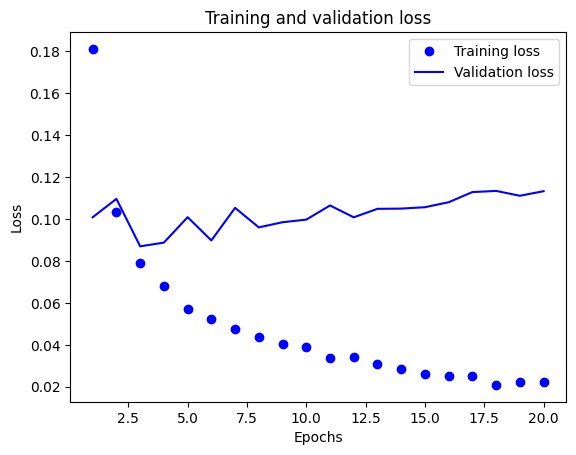

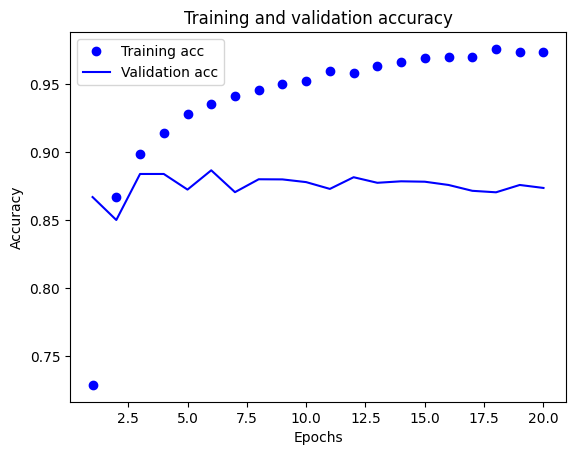

In [78]:
#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [79]:
#Re-train the model from scratch
model9 = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model9.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model9.fit(train_x, train_y, epochs=3, batch_size=512)
results_valid = model9.evaluate(x_valid, y_valid)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.6661 - loss: 0.2047
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8801 - loss: 0.0939
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9054 - loss: 0.0731
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9385 - loss: 0.0493


In [80]:
results_valid

[0.04964417591691017, 0.9383000135421753]

In [81]:
model9.fit(train_x, train_y, epochs=3, batch_size=512)
results_test = model9.evaluate(test_x, test_y)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9160 - loss: 0.0645
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9295 - loss: 0.0562
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9367 - loss: 0.0514
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8732 - loss: 0.1019


In [82]:
results_test

[0.1008196473121643, 0.8752800226211548]

In [83]:
model9.predict(test_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.01311332],
       [0.99856156],
       [0.9330381 ],
       ...,
       [0.03369583],
       [0.00697287],
       [0.21801312]], dtype=float32)

## **Model 10**
#### (1 hidden layer with 32 units with relu activation and L2 Reguralization, MSE)

In [84]:
# creating the model with L2 Regularization
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model10 = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model10.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Validating the model
x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]

# Training the model
history = model10.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.6572 - loss: 0.5769 - val_accuracy: 0.8594 - val_loss: 0.1995
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8610 - loss: 0.1808 - val_accuracy: 0.8179 - val_loss: 0.1742
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8535 - loss: 0.1590 - val_accuracy: 0.7759 - val_loss: 0.1859
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8604 - loss: 0.1550 - val_accuracy: 0.8522 - val_loss: 0.1554
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8532 - loss: 0.1541 - val_accuracy: 0.8642 - val_loss: 0.1487
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8643 - loss: 0.1495 - val_accuracy: 0.8449 - val_loss: 0.1555
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8702 - loss: 0.1441 - val_accuracy: 0.8672 - val_loss: 0.1454
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8699 - loss: 0.1438 - val_accuracy: 0.8471 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

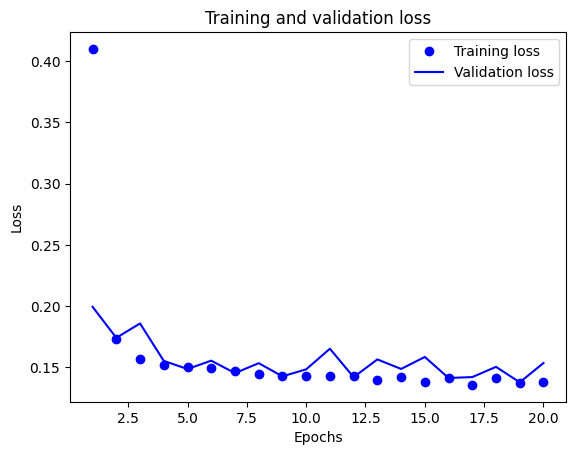

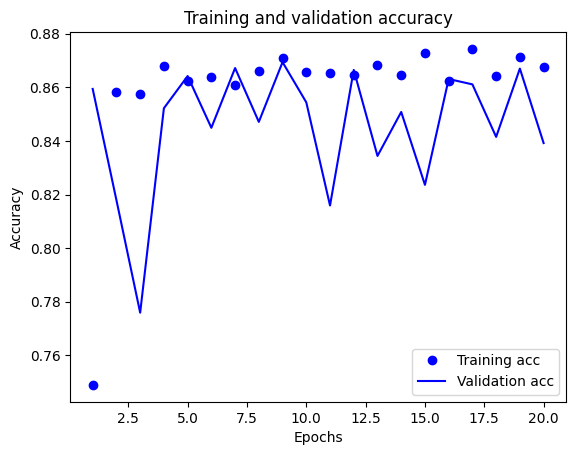

In [85]:
#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [123]:
#Re-train the model from scratch
model10 = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, activation="sigmoid")
])

model10.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model10.fit(train_x, train_y, epochs=7, batch_size=512)
results_valid = model10.evaluate(x_valid, y_valid)

Epoch 1/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7211 - loss: 0.4868
Epoch 2/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8583 - loss: 0.1605
Epoch 3/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8654 - loss: 0.1508
Epoch 4/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8546 - loss: 0.1522
Epoch 5/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8637 - loss: 0.1471
Epoch 6/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8563 - loss: 0.1470
Epoch 7/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8647 - loss: 0.1427
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8827 - loss: 0.1318


In [124]:
results_valid

[0.1326930820941925, 0.8827999830245972]

In [125]:
model10.fit(train_x, train_y, epochs=7, batch_size=512)
results_test = model10.evaluate(test_x, test_y)

Epoch 1/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8639 - loss: 0.1420
Epoch 2/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8602 - loss: 0.1431
Epoch 3/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8645 - loss: 0.1412
Epoch 4/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8576 - loss: 0.1433
Epoch 5/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8520 - loss: 0.1460
Epoch 6/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8576 - loss: 0.1415
Epoch 7/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8670 - loss: 0.1365
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8124 - loss: 0.1628


In [126]:
results_test

[0.1281110942363739, 0.8306000232696533]

In [115]:
model.predict(test_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.47818628],
       [0.9578701 ],
       [0.9513808 ],
       ...,
       [0.3528435 ],
       [0.35813856],
       [0.6621834 ]], dtype=float32)

### Model 11
**Creating the model 11 with relu activation, mse loss function and with Dropout (0.5)**

In [91]:
# creating the model with Dropout (0.5)
from tensorflow import keras
from tensorflow.keras import layers

model11 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model11.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Validating the model
x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]

# Training the model
history = model11.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.5472 - loss: 0.2450 - val_accuracy: 0.8232 - val_loss: 0.1871
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7328 - loss: 0.1888 - val_accuracy: 0.8623 - val_loss: 0.1157
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8304 - loss: 0.1323 - val_accuracy: 0.8678 - val_loss: 0.0989
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8732 - loss: 0.1036 - val_accuracy: 0.8836 - val_loss: 0.0858
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9014 - loss: 0.0832 - val_accuracy: 0.8849 - val_loss: 0.0872
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9241 - loss: 0.0651 - val_accuracy: 0.8882 - val_loss: 0.0862
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9286 - loss: 0.0603 - val_accuracy: 0.8894 - val_loss: 0.0873
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9418 - loss: 0.0498 - val_accuracy: 0.8838 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

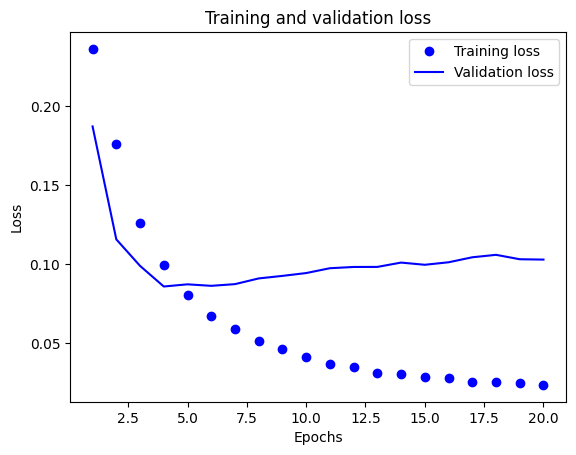

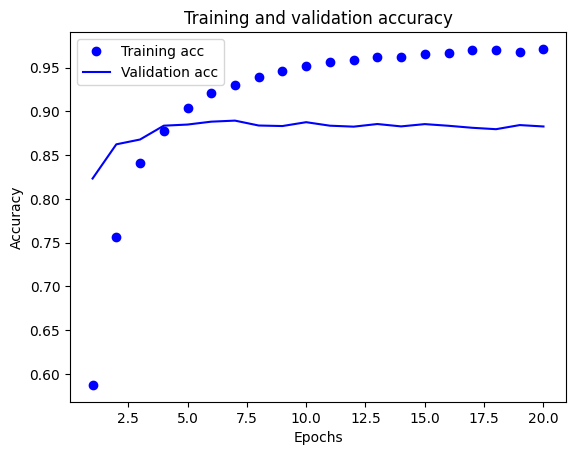

In [92]:
#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [93]:
#Re-train the model from scratch
model11 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model11.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model11.fit(train_x, train_y, epochs=4, batch_size=512)
results_valid = model11.evaluate(x_valid, y_valid)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5855 - loss: 0.2358
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8077 - loss: 0.1479
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8733 - loss: 0.1041
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9029 - loss: 0.0819
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9430 - loss: 0.0456


In [94]:
results_valid

[0.04635937511920929, 0.9419999718666077]

In [95]:
model11.fit(train_x, train_y, epochs=4, batch_size=512)
results_test = model11.evaluate(test_x, test_y)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9167 - loss: 0.0692
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9322 - loss: 0.0578
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9366 - loss: 0.0537
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9439 - loss: 0.0475
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8836 - loss: 0.0944


In [96]:
results_test

[0.09314420819282532, 0.885640025138855]

**# creating the model 12  with tanh activation, mse as loss function and with L2 Regularization**

In [120]:
# creating the model 12  with tanh activation, mse as loss function and with L2 Regularization
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model12 = keras.Sequential([
    layers.Dense(32, activation="tanh",kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model12.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Validating the model
x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]

# Training the model
history = model12.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.6813 - loss: 0.5735 - val_accuracy: 0.8575 - val_loss: 0.2006
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8614 - loss: 0.1817 - val_accuracy: 0.8607 - val_loss: 0.1602
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8646 - loss: 0.1573 - val_accuracy: 0.8683 - val_loss: 0.1526
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8768 - loss: 0.1457 - val_accuracy: 0.8636 - val_loss: 0.1498
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8604 - loss: 0.1496 - val_accuracy: 0.7823 - val_loss: 0.1811
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8589 - loss: 0.1465 - val_accuracy: 0.8038 - val_loss: 0.1699
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8563 - loss: 0.1480 - val_accuracy: 0.8284 - val_loss: 0.1592
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8706 - loss: 0.1390 - val_accuracy: 0.8625 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

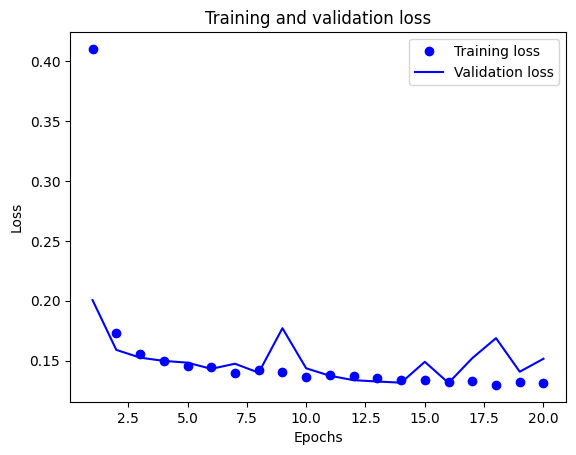

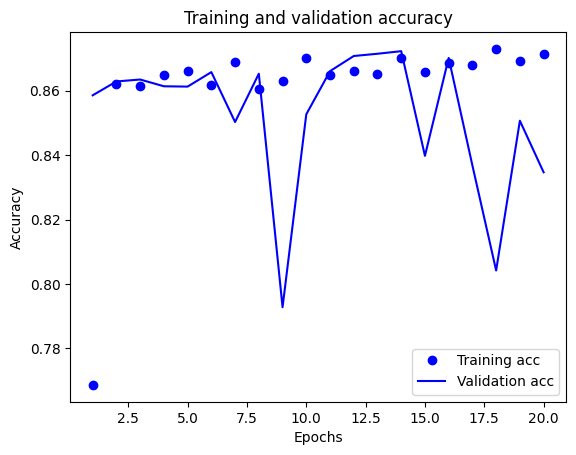

In [117]:
#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [121]:
#Re-train the model from scratch
model12 = keras.Sequential([
    layers.Dense(32, activation="tanh",kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, activation="sigmoid")
])

model12.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model12.fit(train_x, train_y, epochs=4, batch_size=512)
results_valid = model12.evaluate(x_valid, y_valid)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7121 - loss: 0.4959
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8575 - loss: 0.1610
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8584 - loss: 0.1502
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8620 - loss: 0.1435
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8941 - loss: 0.1264


In [122]:
results_valid

[0.12823617458343506, 0.8892999887466431]

In [128]:
model12.fit(train_x, train_y, epochs=4, batch_size=512)
results_test = model12.evaluate(test_x, test_y)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8642 - loss: 0.1328
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8683 - loss: 0.1304
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8716 - loss: 0.1275
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8741 - loss: 0.1268
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8457 - loss: 0.1418


In [129]:
results_test

[0.14233805239200592, 0.84579998254776]